# 图像特效-径向模糊

In [6]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [7]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [23]:
def radial_blur(src,iteration=1, angle=30.):
    srcf = src.astype(np.float32)
    dst = np.zeros_like(srcf)
    height,width = srcf.shape[0],srcf.shape[1]
    angle = angle%360
    radian = angle/180.0*np.pi
    radian2 = radian*radian
    iteration2 = iteration*iteration
    midX = width//2
    midY = height/2
    count = 0
    for i in range(height):
        for j in range(width):
            count= 0
            xoffsetCCW = xoffsetCW = j-midX
            yoffsetCCW = yoffsetCW = i-midY
            rSum, gSum, bSum = 0.,0.,0.
            count += 1
            rSum += srcf[i,j,0]
            gSum += srcf[i,j,1]
            bSum += srcf[i,j,2]
            
            for k in range(iteration):
                # 逆时针（正向）偏移
                xoffset = xoffsetCCW
                yoffset = yoffsetCCW
                
                xoffsetCCW = xoffset - radian*yoffset/iteration - radian2*xoffset/iteration2
                yoffsetCCW = yoffset - radian*xoffset/iteration - radian2*yoffsetCCW/iteration2
                
                i0 = int(yoffsetCCW + midY)
                j0 = int(xoffsetCCW + midX)
                
                if i0>=0 and i0<height and j0>=0 and j0<width:
                    count += 1
                    rSum += srcf[i0,j0,0]
                    gSum += srcf[i0,j0,1]
                    bSum += srcf[i0,j0,2]
                # 顺时针偏移
                xoffset = xoffsetCW
                yoffset = yoffsetCW
                xoffsetCW = xoffset + radian*yoffset/iteration - radian2*xoffset/iteration2
                yoffsetCW = yoffset - radian*xoffset/iteration2 - radian2*yoffset/iteration2
                
                i0 = int(yoffsetCW + midY)
                j0 = int(xoffsetCW + midX)
                
                if i0>=0 and i0<height and j0>=0 and j0<width:
                    count += 1
                    rSum += srcf[i0,j0,0]
                    gSum += srcf[i0,j0,1]
                    bSum += srcf[i0,j0,2]
            dst[i,j,0] = rSum / count
            dst[i,j,1] = gSum / count
            dst[i,j,2] = bSum / count
    dst[dst <0] = 0
    dst[dst > 255] = 255
    return dst.astype('uint8')

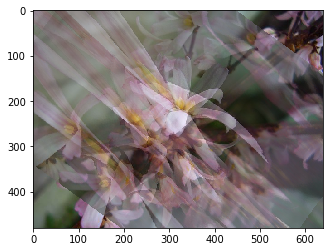

In [24]:
dst = radial_blur(rgb)
plt.imshow(dst)